# Machine Learning II for Insurance Example

### Adopted from [Randal S. Olson](http://www.randalolson.com/) 
#### Edited by ASKS Data Science Group
#### Supported by [THRES]

## Table of contents

1. [License](#License)
2. [Step 1: Problem Setting](#Step-1:-Problem-Setting)
3. [Step 2: Unsupervised Learning Methodologies](#Step-2:-Unsupervised-Learning-Methodologies)
    - [kMean Clustering](#kMean-Clustering)
    - [DBSCAN](#DBSCAN)
    - [Agglomerative Hierarchical Clustering](#Agglomerative-Hierarchical-Clustering)
4. [Step 3: Methodologies](#Step-3:-Methodologies)
    - [Feature Selection](#Feature-Selection)
    - [PCA](#PCA)
    - [Normalized value](#Normalized-value)
5. [Step 4: Understanding the Clusters](#Step-4:-Understanding-the-Clusters)

## License

Please see the original [repository README file](https://github.com/rhiever/Data-Analysis-and-Machine-Learning-Projects#license) for the licenses and usage terms for the instructional material and code in this notebook. I cloned and then edited it from the original authors. For any further usage, please follows the 

## Step 1: Problem Setting

For this workshop, we will work on a new dataset, the Insurance Company Benchmark (COIL 2000) dataset. It is actually the dataset for the supervised learning task. Note that, the unsupervised learning is assumed to have no label. As such, we will ignore its labels.

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

insurance_data = pd.read_csv('../data/ticdata2000.csv', na_values=['NA'])
print(insurance_data.head())

   MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0       33         1        3         2         8       0       5       1   
1       37         1        2         2         8       1       4       1   
2       37         1        2         2         8       0       4       2   
3        9         1        3         3         3       2       3       2   
4       40         1        4         2        10       1       4       1   

   MGODGE  MRELGE   ...     APERSONG  AGEZONG  AWAOREG  ABRAND  AZEILPL  \
0       3       7   ...            0        0        0       1        0   
1       4       6   ...            0        0        0       1        0   
2       4       3   ...            0        0        0       1        0   
3       4       5   ...            0        0        0       1        0   
4       4       7   ...            0        0        0       1        0   

   APLEZIER  AFIETS  AINBOED  ABYSTAND  CARAVAN  
0         0       0        0        

Next, we look at the distribution of our data by printing out some summary statistics about the data set.


In [2]:
insurance_data.describe(include='all')

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [3]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(insurance_data)
print(pca.explained_variance_ratio_) 

[0.59210254 0.09653011]


[[ -9.23275155  -5.12945182]
 [-12.13061886  -4.92775787]
 [-13.30879988   4.62780541]
 ...
 [-10.53946674   5.8341284 ]
 [-10.24653536  -4.76006927]
 [ -9.55564144   0.16885586]]


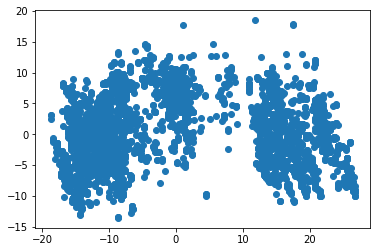

In [4]:
insurance_pca = pca.transform(insurance_data)
plt.scatter(insurance_pca[:, 0], insurance_pca[:, 1])
print(insurance_pca)

Can you make out some groups? 

## Step 2: Unsupervised Learning Methodologies

After data preparation process, our data is assume to be cleaned. Next, we can begin our clustering algorithms.

<hr />

There is a blog about the top 5 clustering algorithms in the link belows. (We will learn 3 of them.)
https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

### kMean Clustering

kMean clustering is the simplest clustering algorithm. The idea is to select k distinct centers. Then, we assign the data points to its closest centers. Then, we recalculate the new center of each group. We continue this process till the group assignment converges.

In [5]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances

kmeans = KMeans()
kmeans.fit(insurance_data)
if kmeans.cluster_centers_.size > 1:
    # The Davies-Bouldin index (sklearn.metrics.davies_bouldin_score) can be used to evaluate the model, 
    # where a lower Davies-Bouldin index relates to a model with better separation between the clusters.
    print('Davies-Bouldin index: {}'.format(metrics.davies_bouldin_score(insurance_data, kmeans.labels_)))
    # The higher Calinski-Harabaz score relates to a model with better defined clusters.
    print('Calinski-Harabaz score: {}'.format(metrics.calinski_harabaz_score(insurance_data, kmeans.labels_)))
    # A higher Silhouette Coefficient score relates to a model with better defined clusters.
    print("Silhouette Coefficient: {}".format(metrics.silhouette_score(insurance_data, kmeans.labels_)))

Davies-Bouldin index: 2.3251814315161545
Calinski-Harabaz score: 1630.155580330182
Silhouette Coefficient: 0.11446364556237033


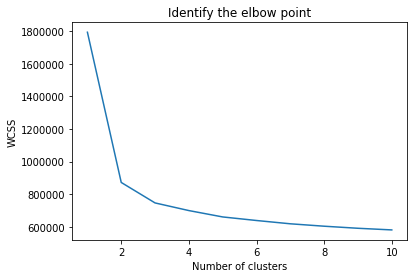

In [6]:
#Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(insurance_data)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('Identify the elbow point')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [7]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_out = kmeans.fit_predict(insurance_data)
# The sum of square distances of all the objects in the cluster
if kmeans.cluster_centers_.size > 1:
    print('Davies-Bouldin index: {}'.format(metrics.davies_bouldin_score(insurance_data, kmeans.labels_)))
    print('Calinski-Harabaz score: {}'.format(metrics.calinski_harabaz_score(insurance_data, kmeans.labels_)))
    print("Silhouette Coefficient: {}".format(metrics.silhouette_score(insurance_data, kmeans.labels_)))

Davies-Bouldin index: 1.4771088102470538
Calinski-Harabaz score: 4083.600246325955
Silhouette Coefficient: 0.2668515666866124


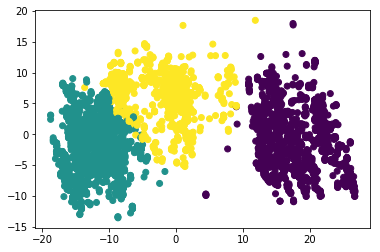

In [8]:
plt.scatter(insurance_pca[:, 0], insurance_pca[:, 1], c=kmeans_out)

### DBSCAN

The DBSCAN clusters object based on density. The assumption is that the object of the same type should have the same underlying distribution. In other words, they should be a given distance from a point, there should be other points in the same group. A cluster is therefore a set of core points, each close to each other and a set of non-core points that are close to a core points. As such, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped. 

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)
Davies-Bouldin index: 1.2011832762990635
Calinski-Harabaz score: 4.34103187425933
Silhouette Coefficient: -0.3921803790268335


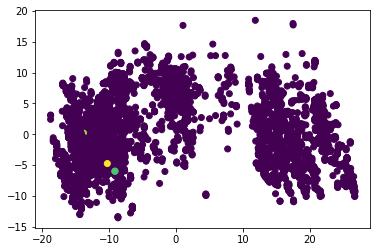

In [9]:
from sklearn.cluster import DBSCAN

dbscan_cls = DBSCAN()
print(dbscan_cls)
dbscan_cls.fit(insurance_data)
if dbscan_cls.core_sample_indices_.size > 1:
    print('Davies-Bouldin index: {}'.format(metrics.davies_bouldin_score(insurance_data, dbscan_cls.labels_)))
    print('Calinski-Harabaz score: {}'.format(metrics.calinski_harabaz_score(insurance_data, dbscan_cls.labels_)))
    print("Silhouette Coefficient: {}".format(metrics.silhouette_score(insurance_data, dbscan_cls.labels_)))
plt.scatter(insurance_pca[:, 0], insurance_pca[:, 1], c=dbscan_cls.labels_)

It is as expected that the dbscan will not work well because the data is rather dense.

### Agglomerative Hierarchical Clustering

There is an expression, "brick-by-brick". This one fits the nature of the Hierarchical Clustering nicely.  Hierarchical Clustering builds the cluster by joining two closest objects at a time. The object can be either a single point, or a small cluster.

In [10]:
from sklearn.cluster import AgglomerativeClustering
agg_hier_cls = AgglomerativeClustering()
agg_hier_cls.fit(insurance_data)

print('Davies-Bouldin index: {}'.format(metrics.davies_bouldin_score(insurance_data, agg_hier_cls.labels_)))
print('Calinski-Harabaz score: {}'.format(metrics.calinski_harabaz_score(insurance_data, agg_hier_cls.labels_)))
print("Silhouette Coefficient: {}".format(metrics.silhouette_score(insurance_data, agg_hier_cls.labels_)))

Davies-Bouldin index: 0.8888888379951246
Calinski-Harabaz score: 6056.574197419303
Silhouette Coefficient: 0.44660212553486756


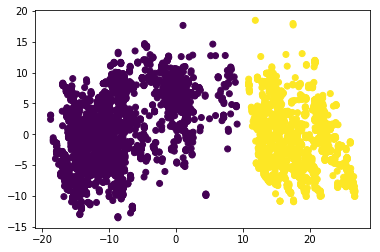

In [11]:
plt.scatter(insurance_pca[:, 0], insurance_pca[:, 1], c=agg_hier_cls.labels_)

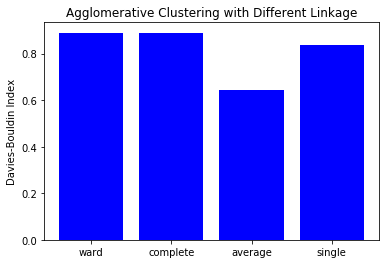

In [12]:
linkage_param = ['ward', 'complete', 'average', 'single']

db_score = []

for x in linkage_param:
    agg_hier_cls = AgglomerativeClustering(linkage=x)
    agg_hier_cls.fit(insurance_data)
    db_score.append(metrics.davies_bouldin_score(insurance_data, agg_hier_cls.labels_))
    
position = np.arange(len(linkage_param))
width = 0.8     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(position)
ax.set_xticklabels(linkage_param)
plt.title('Agglomerative Clustering with Different Linkage')
plt.ylabel('Davies-Bouldin Index')
plt.bar(position, db_score, width, color='b')
plt.show()

## Step 3: Methodologies

Things that can help you improve your model's performance are the feature selection process, and the dimension reduction.

### Feature Selection

Feature selection is simply selecting the 'relevant' feature to the current task. Unlike the supervised learning, since we cannot fully evaluate the model performance, we can try one things: removing feature with very low variance.

In [13]:
# For low variance feature selection, we will set an example threshold to 80%
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
print(insurance_data.shape)
insurance_data_vt = sel.fit_transform(insurance_data)
print(insurance_data_vt.shape)
sub = sel.get_support()
name = []
c = 0
for i in insurance_data.columns:
    if sub[c]:
        name.append(i)
    c = c+1
    
insurance_selected = pd.DataFrame(data=insurance_data_vt,columns=name)
insurance_selected.head()

(5822, 86)
(5822, 56)


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,PBESAUT,PMOTSCO,PTRACTOR,PBROM,PLEVEN,PBRAND,PBYSTAND,AWAPART,APERSAUT,ABRAND
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,0,0,5,0,0,1,1
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,0,0,2,0,2,0,1
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,0,0,2,0,1,1,1
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,0,0,2,0,0,1,1
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,0,0,6,0,0,0,1


In [14]:
# Now let's try to cluster and see if it improve
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_out = kmeans.fit_predict(insurance_selected)
# The sum of square distances of all the objects in the cluster
if kmeans.cluster_centers_.size > 1:
    print('Davies-Bouldin index: {}'.format(metrics.davies_bouldin_score(insurance_selected, kmeans.labels_)))
    print('Calinski-Harabaz score: {}'.format(metrics.calinski_harabaz_score(insurance_selected, kmeans.labels_)))
    print("Silhouette Coefficient: {}".format(metrics.silhouette_score(insurance_selected, kmeans.labels_)))

Davies-Bouldin index: 1.4712522321173491
Calinski-Harabaz score: 4122.530053904663
Silhouette Coefficient: 0.26874276930177593


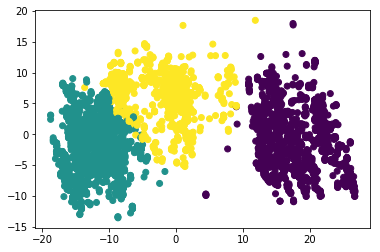

In [15]:
plt.scatter(insurance_pca[:, 0], insurance_pca[:, 1], c=kmeans_out)

### PCA

Let us try to apply PCA for this clustering task

Davies-Bouldin index: 1.4720212355130622
Calinski-Harabaz score: 4122.53161628108
Silhouette Coefficient: 0.2685933280651049


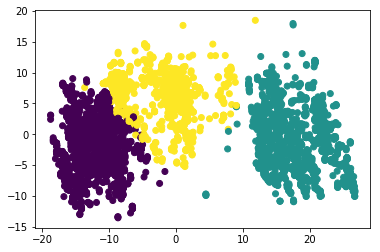

In [16]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=25)
pca.fit(insurance_data)
insurance_pca = pca.transform(insurance_data)
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_out = kmeans.fit_predict(insurance_pca)
if kmeans.cluster_centers_.size > 1:
    print('Davies-Bouldin index: {}'.format(metrics.davies_bouldin_score(insurance_selected, kmeans.labels_)))
    print('Calinski-Harabaz score: {}'.format(metrics.calinski_harabaz_score(insurance_selected, kmeans.labels_)))
    print("Silhouette Coefficient: {}".format(metrics.silhouette_score(insurance_selected, kmeans.labels_)))
plt.scatter(insurance_pca[:, 0], insurance_pca[:, 1], c=kmeans_out)

### Normalized value

Since, we use euclidean distance function. Having a value on the different scales can greatly impact the final cluster assignment. Let's see if it does so.

In [17]:
from sklearn import preprocessing

# normalized data
insurance_data_narray = insurance_data.values 
min_max_scaler = preprocessing.MinMaxScaler()
narray_scaled = min_max_scaler.fit_transform(insurance_data_narray)
insurance_scaled_data = pd.DataFrame(narray_scaled)
insurance_scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,0.800,0.0,0.50,0.2,0.777778,0.000000,0.555556,0.2,0.333333,0.777778,...,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0
1,0.900,0.0,0.25,0.2,0.777778,0.111111,0.444444,0.2,0.444444,0.666667,...,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0
2,0.900,0.0,0.25,0.2,0.777778,0.000000,0.444444,0.4,0.444444,0.333333,...,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0
3,0.200,0.0,0.50,0.4,0.222222,0.222222,0.333333,0.4,0.444444,0.555556,...,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0
4,0.975,0.0,0.75,0.2,1.000000,0.111111,0.444444,0.2,0.444444,0.777778,...,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Now let's try to cluster and see if it improve
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans_out = kmeans.fit_predict(insurance_selected)
# The sum of square distances of all the objects in the cluster
if kmeans.cluster_centers_.size > 1:
    print('Davies-Bouldin index: {}'.format(metrics.davies_bouldin_score(insurance_selected, kmeans.labels_)))
    print('Calinski-Harabaz score: {}'.format(metrics.calinski_harabaz_score(insurance_selected, kmeans.labels_)))
    print("Silhouette Coefficient: {}".format(metrics.silhouette_score(insurance_selected, kmeans.labels_)))

Davies-Bouldin index: 1.4712522321173491
Calinski-Harabaz score: 4122.530053904663
Silhouette Coefficient: 0.26874276930177593


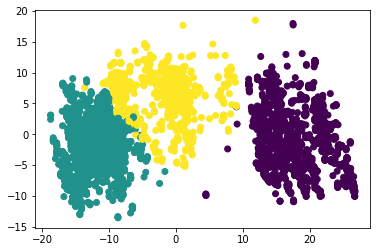

In [19]:
plt.scatter(insurance_pca[:, 0], insurance_pca[:, 1], c=kmeans_out)

It seems that this is as far as we can go with the current algorithms. Let us see if the clusters are meaningful.

## Step 4: Understanding the Clusters

So far, we have tried a few clustering algorithms. However, we have not really interprete the results. Let us try to understand it a little bit. Let us look at the k-mean clustering results if they make any sense. To do this, one simply check the data in the same cluster whether or not it make sense for them to be together.

Let us insert the last cluster label to it as a record. Then, we can analyze each group

In [20]:
insurance_data['cls_label'] = kmeans.labels_
insurance_data.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,cls_label
0,33,1,3,2,8,0,5,1,3,7,...,0,0,1,0,0,0,0,0,0,1
1,37,1,2,2,8,1,4,1,4,6,...,0,0,1,0,0,0,0,0,0,1
2,37,1,2,2,8,0,4,2,4,3,...,0,0,1,0,0,0,0,0,0,1
3,9,1,3,3,3,2,3,2,4,5,...,0,0,1,0,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,1,0,0,0,0,0,0,1


In [21]:
insur_grp_one = insurance_data.loc[insurance_data['cls_label'] == 0]
insur_grp_one.describe(include='all')

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,cls_label
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.0
mean,7.617677,1.115108,2.886948,2.948099,2.180370,0.951696,4.503083,1.057040,3.241007,6.798047,...,0.008736,0.005653,0.582220,0.000514,0.007708,0.039054,0.010791,0.023638,0.088900,0.0
std,3.676337,0.369962,0.765962,0.777498,0.854954,1.159616,1.700216,1.034288,1.665307,1.605523,...,0.093081,0.087636,0.549524,0.022669,0.098535,0.236765,0.108207,0.151958,0.284673,0.0
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.000000,1.000000,2.000000,2.000000,1.000000,0.000000,4.000000,0.000000,2.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,8.000000,1.000000,3.000000,3.000000,2.000000,1.000000,5.000000,1.000000,3.000000,7.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,10.000000,1.000000,3.000000,3.000000,3.000000,2.000000,5.000000,2.000000,4.000000,8.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,22.000000,8.000000,5.000000,6.000000,5.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,2.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,0.0


In [22]:
insur_grp_one.sample(n=20)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,cls_label
5360,10,1,4,3,3,0,5,2,3,7,...,0,0,0,0,0,0,0,0,0,0
5633,13,1,3,3,3,0,6,0,3,6,...,0,0,0,0,0,0,0,0,0,0
4811,13,1,2,2,3,0,4,2,4,7,...,0,0,0,0,0,1,0,0,0,0
3897,11,1,1,2,3,0,5,1,4,4,...,0,0,1,0,0,0,0,0,0,0
594,1,1,3,4,1,1,5,1,3,6,...,0,0,0,0,0,0,0,0,0,0
2222,8,1,3,3,2,1,7,0,1,6,...,0,0,1,0,0,0,0,0,1,0
585,7,1,3,2,2,0,7,2,0,7,...,0,0,1,0,0,0,0,0,0,0
909,13,1,3,2,3,1,7,0,2,7,...,0,0,1,0,0,1,1,0,0,0
2905,13,1,3,3,3,2,4,1,3,6,...,0,0,1,0,0,0,0,0,0,0
549,1,1,3,4,1,2,2,2,5,7,...,0,0,0,0,0,0,0,0,0,0


In [23]:
insur_grp_two = insurance_data.loc[insurance_data['cls_label'] == 1]
insur_grp_two.describe(include='all')

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,cls_label
count,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,...,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.0
mean,35.703856,1.079745,2.826282,2.985773,8.384500,0.483340,4.931861,0.983901,3.118682,6.576563,...,0.005990,0.005616,0.576189,0.000749,0.005990,0.032198,0.007113,0.009734,0.052415,1.0
std,2.969808,0.270949,0.710382,0.658980,0.766362,0.832623,1.680200,1.013081,1.526713,1.536338,...,0.077179,0.084170,0.582596,0.027359,0.077179,0.211319,0.084056,0.101942,0.222904,0.0
min,27.000000,1.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,33.000000,1.000000,2.000000,3.000000,8.000000,0.000000,4.000000,0.000000,2.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,35.000000,1.000000,3.000000,3.000000,8.000000,0.000000,5.000000,1.000000,3.000000,7.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,38.000000,1.000000,3.000000,3.000000,9.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,41.000000,2.000000,5.000000,5.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,2.000000,7.000000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,1.0


In [24]:
insur_grp_two.sample(n=20)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,cls_label
38,39,1,3,2,9,0,6,0,3,6,...,0,0,1,0,0,0,0,0,0,1
2930,33,1,4,2,8,0,6,2,1,6,...,0,0,1,0,0,0,0,0,0,1
571,38,1,2,2,9,0,4,1,5,6,...,0,0,0,0,0,0,0,0,0,1
4645,39,1,2,4,9,4,4,0,2,9,...,0,0,1,0,0,0,0,0,0,1
4696,36,1,1,3,8,0,4,4,2,6,...,0,0,1,0,0,0,0,0,0,1
3846,33,1,3,4,8,0,7,0,2,6,...,0,0,1,0,0,0,0,0,0,1
0,33,1,3,2,8,0,5,1,3,7,...,0,0,1,0,0,0,0,0,0,1
5000,39,1,2,2,9,1,4,1,4,2,...,0,0,0,0,0,0,0,0,0,1
5378,33,1,3,3,8,0,7,0,2,8,...,0,0,1,0,0,0,0,0,1,1
4458,41,1,4,2,10,1,5,1,3,6,...,0,0,1,0,0,0,0,0,0,1


In [25]:
insur_grp_three = insurance_data.loc[insurance_data['cls_label'] == 2]
insur_grp_three.describe(include='all')

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,cls_label
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,...,1205.000000,1205.000000,1205.000000,1205.0,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.0
mean,25.737759,1.171784,2.015768,3.073029,5.789212,0.756846,4.151037,1.281328,3.596680,4.319502,...,0.004149,0.000830,0.536929,0.0,0.003320,0.019087,0.004979,0.009129,0.029046,2.0
std,4.018348,0.637583,0.625258,1.121955,0.991014,0.972955,1.686991,0.969480,1.591607,1.949101,...,0.064309,0.028808,0.534217,0.0,0.057543,0.159320,0.070417,0.095146,0.168004,0.0
min,9.000000,1.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,23.000000,1.000000,2.000000,2.000000,5.000000,0.000000,3.000000,1.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,24.000000,1.000000,2.000000,3.000000,5.000000,0.000000,4.000000,1.000000,4.000000,5.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
75%,30.000000,1.000000,2.000000,4.000000,7.000000,1.000000,5.000000,2.000000,5.000000,6.000000,...,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
max,38.000000,10.000000,4.000000,6.000000,9.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,5.000000,0.0,1.000000,2.000000,1.000000,1.000000,1.000000,2.0


In [26]:
insur_grp_three.sample(n=20)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,cls_label
1142,32,1,2,3,7,0,2,2,5,5,...,0,0,1,0,0,0,0,0,1,2
4548,24,1,2,3,5,1,5,1,3,4,...,0,0,0,0,0,0,0,0,0,2
5276,24,1,3,2,5,1,4,2,4,7,...,0,0,0,0,0,0,0,0,0,2
2251,26,1,1,5,6,0,5,0,4,5,...,0,0,0,0,0,0,0,0,0,2
1420,31,1,2,4,7,0,5,0,4,3,...,0,0,1,0,0,0,0,0,0,2
3928,24,1,2,5,5,1,5,1,3,4,...,0,0,0,0,0,0,0,0,0,2
5140,23,1,2,3,5,3,2,1,3,5,...,0,0,0,0,0,0,0,0,0,2
1257,32,1,3,2,7,0,5,0,4,5,...,0,0,1,0,0,0,0,0,0,2
3126,22,2,3,3,5,0,5,0,4,7,...,0,0,0,0,0,0,0,0,0,2
3345,23,1,1,2,5,1,4,2,4,2,...,0,0,1,0,0,0,0,0,0,2


From the first glance, the MOSTYPE varies greatly among the three group. As such it may 

In [1]:
%load_ext watermark
%watermark -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn,itertools

Thu Nov 22 2018 

CPython 3.7.1
IPython 7.1.1

numpy 1.15.4
pandas 0.23.4
sklearn 0.20.0
matplotlib 3.0.2
seaborn 0.9.0
itertools unknown

compiler   : Clang 6.0 (clang-600.0.57)
system     : Darwin
release    : 18.2.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
